# Review: Programming Exercise 09

## Count The Number Of Ways To Traverse A 2D Array

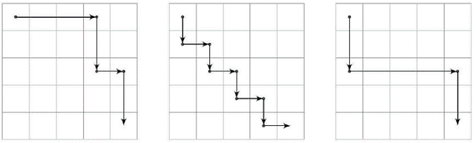

DP Tabulation for 4x4

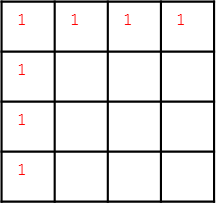

In [ ]:
def number_of_ways(n:int, m:int)->int:
    dp = [x[:] for x in [[1]*m]*n]

    for i in range(1,n):
        for j in range(1,m):
            dp[i][j] = dp[i-1][j] + dp[i][j-1] #need fix: 此(i,j)格內容是將上面一格與左邊一格相加後結果

    return dp[-1][-1] #need fix: 回傳哪一格的值？

In [ ]:
print(number_of_ways(5,5))
#70
print(number_of_ways(1,5))
#1
print(number_of_ways(12,15))
#4457400
print(number_of_ways(20,1))
#1
print(number_of_ways(16,20))
#1855967520

70
1
4457400
1
1855967520


## Interleaving String : zuvio 

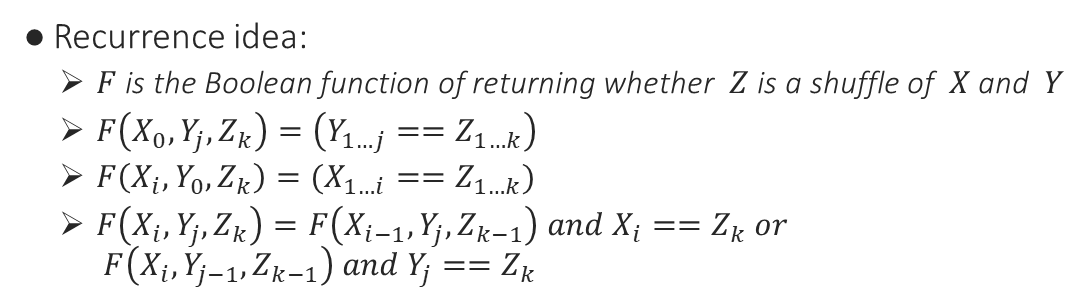

DP Tabulation for Is the string "aaxaby" is a shuffle of X="aab" and Y="axy"?

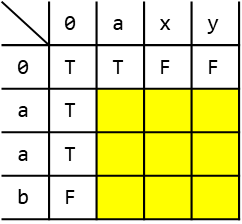



In [ ]:
def is_interleaved(x:str, y:str, z:str)->bool:
    T = [x[:] for x in [[False]*(len(y)+1)]*(len(x)+1)]
    T[0][0] = True

    if len(z) != len(x) + len(y): #如果z長度不是x長度+y長度就不用做下去了
        return False

    for j in range(1, len(y)+1):
        T[0][j] = T[0][j-1] and y[j-1] == z[j-1] # need fix: 參考第一個遞迴關係式子：左邊那格必須為True且z[j-1]字元與y[j-1]字元一樣(因為j比索引多1)

    for i in range(1, len(x)+1):
        T[i][0] = T[i-1][0] and x[i-1] == z[i-1]# need fix: 參考第二個遞迴關係式子：上邊那格必須為True且z[i-1]字元與x[i-1]字元一樣(因為i比索引多1)

    if len(x) > 0 and len(y) > 0:
        for i in range(1, len(x)+1):
            for j in range(1, len(y)+1):
                k = i+j
                T[i][j] = T[i-1][j] and x[i-1] == z[k-1] or \
                          T[i][j-1] and y[j-1] == z[k-1]# need fix: 參考第三個遞迴關係式子：上邊那格必須為True且z[k-1]字元與x[i-1]字元一樣 或 左邊那格必須為True且z[k-1]字元與y[j-1]字元一樣(注意：i,j比索引多1)

    return T[-1][-1] #need fix: 回傳哪一格的值？

In [ ]:
x = "chocolate"
y = "chips"
z = "cchocohilaptes"
print(is_interleaved(x,y,z))
#True
x = "chocolate"
y = "chips"
z = "chocochilatspe"
print(is_interleaved(x,y,z))
#False
x = "a"
y = ""
z = "a"
print(is_interleaved(x,y,z))
#True
x = "db"
y = "b"
z = "cbb"
print(is_interleaved(x,y,z))
#False
x = "internationalization"
y = "unenthusiastically"
z = "iunnteernthnatiusonaiastliiazcatilolny"
print(is_interleaved(x,y,z))
#False

True
False
True
False
False


# Class start here !!! 

# Customizing Edit Distance: "Substring" Matching

In [4]:
class Cell:
    def __init__(self):
        self.cost = 0 #Cost of reaching this cell
        self.parent = -1 #Parent opt
    def __str__(self):
        return f"{self.cost}[{str(self.parent)[0]}]"

def init_matrix(m:list):
    for i in range(len(m)):
        for j in range(len(m[0])):
            m[i][j] = Cell()
            # if i == 0: #Row init
            #     m[0][j].cost = j
            #     if j > 0:
            #         m[0][j].parent = 'INSERT'
        m[i][0].cost = i #Column init
        if i > 0:
            m[i][0].parent = 'DELETE'

# def reconstruct_path(m:list, s:str, t:str, i:int, j:int):
#    if m[i][j].parent == -1:
#        return
#    elif m[i][j].parent == 'MATCH':
#        yield from reconstruct_path(m, s, t, i-1, j-1)
#        yield match_out(s[i-1],t[j-1])
#    elif m[i][j].parent == 'INSERT':
#        yield from reconstruct_path(m, s, t, i, j-1)
#        yield insert_out(s[i],t[j-1])
#    elif m[i][j].parent == 'DELETE':
#        yield from reconstruct_path(m, s, t, i-1, j)
#        yield delete_out(s[i-1],t[j])

# def match_out(c:str, d:str)->str:
#    return ('M' if c == d else 'S')

# def insert_out(c:str, d:str)->str:
#    return 'I'

# def delete_out(c:str, d:str)->str:
#    return 'D'

algo start here : analyze here !!

In [10]:
def string_compare(s:str, t:str)->int:  # return new thing based on goal sell 
    opt = {}
    init_matrix(m)
    for i in range(1, len(s)+1):
        for j in range(1, len(t)+1):
            opt['MATCH'] = m[i-1][j-1].cost + (0 if s[i-1] == t[j-1] else 1)
            opt['INSERT'] = m[i][j-1].cost + 1
            opt['DELETE'] = m[i-1][j].cost + 1
            m[i][j].cost = min(opt.values())
            m[i][j].parent = min(opt, key=opt.get)
    #return m[len(s)][len(t)].cost
    goal = goal_cell(m,s,t)
    print(goal, t[goal[1]-len(s):goal[1]])
    return m[goal[0]][goal[1]].cost


def goal_cell(m:list, s:str ,t:str)->list:    # this is new 
    #goal = [len(s), 0]
    #for k in range(1, len(t)+1):
    #    if m[goal[0]][k].cost < m[goal[0]][goal[1]].cost:
    #        goal[1] = k
    #return goal
    bottom_row = m[len(s)]
    return [len(s), bottom_row.index(min(bottom_row, key=lambda x:x.cost))]

In [11]:
s = 'shot'
#s = 'sport'
t = 'The movie opens with a dreamy shot of a sunset'
####01234567890123456789012345678901234567890123456

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

print(string_compare(s,t))
for row in m:
    print(" ".join(map(str, row)))

[4, 34] shot
0
0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-]
1[D] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 0[M] 1[M] 1[M]
2[D] 2[M] 1[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 1[D] 1[M] 2[M] 2[M] 2[M] 1[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 1[D] 0[M] 1[I] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 1[D] 1[M] 2[M] 1[D] 1[M] 2[M]
3[D] 3[M] 2[D] 2[M] 3[M] 3[M] 2[M] 3[M] 3[M] 3[M] 3[M] 2[M] 3[M] 3[M] 3[M] 2[D] 2[M] 2[M] 3[M] 3[M] 2[D] 2[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 2[D] 1[D] 0[M] 1[I] 2[I] 2[M] 3[M] 3[M] 3[M] 3[M] 2[D] 2[M] 2[M] 2[D] 2[M] 2[M]
4[D] 4[M] 3[D] 3[M] 3[M] 4[M] 3[D] 3[M] 4[M] 

In [7]:
s = 'shot'
#t = 'He is just starting shooting his new movie'
t = 'This shop is perfect for all sorts of sport'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

print(string_compare(s,t))
for row in m:
    print(" ".join(map(str, row)))

[4, 8]  sho
1
0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-]
1[D] 1[M] 1[M] 1[M] 0[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M]
2[D] 2[M] 1[M] 2[M] 1[D] 1[M] 1[D] 0[M] 1[I] 2[M] 2[M] 2[M] 1[D] 1[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 1[D] 1[M] 2[M] 2[M] 1[D] 1[M] 2[M] 2[M] 2[M] 1[D] 1[M] 2[M] 2[M] 2[M]
3[D] 3[M] 2[D] 2[M] 2[D] 2[M] 2[M] 1[D] 0[M] 1[I] 2[I] 3[M] 2[D] 2[M] 2[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 2[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 2[D] 1[M] 2[M] 3[M] 2[D] 2[M] 1[M] 2[I] 3[M] 2[D] 2[M] 1[M] 2[I] 3[M]
4[D] 4[M] 3[D] 3[M] 3[M] 3[M] 3[M] 2[D] 1[D] 1[M] 2[M] 3[M] 3[D] 3[M] 3[M] 3[M] 4[M] 4[M] 4[M] 4[M] 3[M] 4

In [8]:
s = 'This'
t = 'This short is perfect for all sorts of sport'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

print(string_compare(s,t))
for row in m:
    print(" ".join(map(str, row)))

[4, 4] This
0
0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-]
1[D] 0[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M]
2[D] 1[D] 0[M] 1[I] 2[M] 2[M] 2[M] 1[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M]
3[D] 2[D] 1[D] 0[M] 1[I] 2[I] 3[M] 2[D] 2[M] 3[M] 3[M] 3[M] 2[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M]
4[D] 3[D] 2[D] 1[D] 0[M] 1[I] 2[M] 3[I] 3[M] 3[M] 4[M] 4[M] 3[D] 2[M] 3[I] 4[M] 4[M] 4

In [9]:
s = 'all'
t = 'This short is perfect for all sorts of sport'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

print(string_compare(s,t))
for row in m:
    print(" ".join(map(str, row)))

[3, 29] all
0
0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-] 0[-]
1[D] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 0[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M] 1[M]
2[D] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 1[D] 0[M] 1[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M] 2[M]
3[D] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 2[D] 1[M] 0[M] 1[I] 2[I] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M] 3[M]


# Longest Common Subsequence(LCS)

In [ ]:
"""
Algorithms

Dynamic Programming II
Longest Common Subsequence(LCS)

@author: jychang
"""

class Cell:
    def __init__(self):
        self.cost = 0 #Cost of reaching this cell
        self.parent = -1 #Parent opt
    def __str__(self):
        return f"{self.cost}[{str(self.parent)[0]}]"

def init_matrix(m:list):
    for i in range(len(m)):
        for j in range(len(m[0])):
            m[i][j] = Cell()
            if i == 0: #Row init
                m[0][j].cost = j
                if j > 0:
                    m[0][j].parent = 'INSERT'
        m[i][0].cost = i #Column init
        if i > 0:
            m[i][0].parent = 'DELETE'

#def reconstruct_path(m:list, s:str, t:str, i:int, j:int):
#    if m[i][j].parent == -1:
#        return
#    elif m[i][j].parent == 'MATCH':
#        yield from reconstruct_path(m, s, t, i-1, j-1)
#        yield match_out(s[i-1],t[j-1])
#    elif m[i][j].parent == 'INSERT':
#        yield from reconstruct_path(m, s, t, i, j-1)
#        yield insert_out(s[i],t[j-1])
#    elif m[i][j].parent == 'DELETE':
#        yield from reconstruct_path(m, s, t, i-1, j)
#        yield delete_out(s[i-1],t[j])

#def match_out(c:str, d:str)->str:
#    return c

#def insert_out(c:str, d:str)->str:
#    return ''

#def delete_out(c:str, d:str)->str:
#    return ''

def LCS(s:str, t:str)->int:
    opt = {}
    init_matrix(m)
    for i in range(1, len(s)+1):
        for j in range(1, len(t)+1):
            opt['MATCH'] = m[i-1][j-1].cost + (0 if s[i-1] == t[j-1] else float('inf'))
            opt['INSERT'] = m[i][j-1].cost + 1
            opt['DELETE'] = m[i-1][j].cost + 1
            m[i][j].cost = min(opt.values())
            m[i][j].parent = min(opt, key=opt.get)
    return m[len(s)][len(t)].cost
    # goal = goal_cell(m,s,t)
    # return m[goal[0]][goal[1]].cost

#def goal_cell(m:list, s:str ,t:str)->list:
#    goal = [len(s), 0]
#    for k in range(1, len(t)):
#        if m[goal[0]][k].cost < m[goal[0]][goal[1]].cost:
#            goal[1] = k
#    return goal

def LCS_result(m:list, s:str, t:str, i:int, j:int):
    if m[i][j].parent == -1:
        return
    elif m[i][j].parent == 'MATCH':
        yield from LCS_result(m, s, t, i-1, j-1)
        yield s[i-1]  # match_out
    elif m[i][j].parent == 'INSERT':
        yield from LCS_result(m, s, t, i, j-1)
        yield ''  # insert_out
    elif m[i][j].parent == 'DELETE':
        yield from LCS_result(m, s, t, i-1, j)
        yield ''  # delete_out

In [ ]:
s = 'shot'
t = 'sport'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

LCS(s,t)
for row in m:
    print(" ".join(map(str, row)))
print(f"LCS('{s}','{t}') =","".join(LCS_result(m, s, t, len(s), len(t))))

0[-] 1[I] 2[I] 3[I] 4[I] 5[I]
1[D] 0[M] 1[I] 2[I] 3[I] 4[I]
2[D] 1[D] 2[I] 3[I] 4[I] 5[I]
3[D] 2[D] 3[I] 2[M] 3[I] 4[I]
4[D] 3[D] 4[I] 3[D] 4[I] 3[M]
LCS('shot','sport') = sot


In [ ]:
s = 'democrat'
t = 'republican'

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

LCS(s,t)
for row in m:
    print(" ".join(map(str, row)))
print(f"LCS('{s}','{t}') =","".join(LCS_result(m, s, t, len(s), len(t))))

0[-] 1[I] 2[I] 3[I] 4[I] 5[I] 6[I] 7[I] 8[I] 9[I] 10[I]
1[D] 2[I] 3[I] 4[I] 5[I] 6[I] 7[I] 8[I] 9[I] 10[I] 11[I]
2[D] 3[I] 2[M] 3[I] 4[I] 5[I] 6[I] 7[I] 8[I] 9[I] 10[I]
3[D] 4[I] 3[D] 4[I] 5[I] 6[I] 7[I] 8[I] 9[I] 10[I] 11[I]
4[D] 5[I] 4[D] 5[I] 6[I] 7[I] 8[I] 9[I] 10[I] 11[I] 12[I]
5[D] 6[I] 5[D] 6[I] 7[I] 8[I] 9[I] 10[I] 9[M] 10[I] 11[I]
6[D] 5[M] 6[I] 7[I] 8[I] 9[I] 10[I] 11[I] 10[D] 11[I] 12[I]
7[D] 6[D] 7[I] 8[I] 9[I] 10[I] 11[I] 12[I] 11[D] 10[M] 11[I]
8[D] 7[D] 8[I] 9[I] 10[I] 11[I] 12[I] 13[I] 12[D] 11[D] 12[I]
LCS('democrat','republican') = eca


# Maximum Monotone Subsequence(MMS)

In [ ]:
s = "243517698"
t = "".join(sorted(s)) # "123456789"

m = [x[:] for x in [[None]*(len(t)+1)]*(len(s)+1)]

LCS(s,t)
for row in m:
    print(" ".join(map(str, row)))
print(f"LCS('{s}','{t}') =","".join(LCS_result(m, s, t, len(s), len(t))))

0[-] 1[I] 2[I] 3[I] 4[I] 5[I] 6[I] 7[I] 8[I] 9[I]
1[D] 2[I] 1[M] 2[I] 3[I] 4[I] 5[I] 6[I] 7[I] 8[I]
2[D] 3[I] 2[D] 3[I] 2[M] 3[I] 4[I] 5[I] 6[I] 7[I]
3[D] 4[I] 3[D] 2[M] 3[I] 4[I] 5[I] 6[I] 7[I] 8[I]
4[D] 5[I] 4[D] 3[D] 4[I] 3[M] 4[I] 5[I] 6[I] 7[I]
5[D] 4[M] 5[I] 4[D] 5[I] 4[D] 5[I] 6[I] 7[I] 8[I]
6[D] 5[D] 6[I] 5[D] 6[I] 5[D] 6[I] 5[M] 6[I] 7[I]
7[D] 6[D] 7[I] 6[D] 7[I] 6[D] 5[M] 6[I] 7[I] 8[I]
8[D] 7[D] 8[I] 7[D] 8[I] 7[D] 6[D] 7[I] 8[I] 7[M]
9[D] 8[D] 9[I] 8[D] 9[I] 8[D] 7[D] 8[I] 7[M] 8[I]
LCS('243517698','123456789') = 23568
